# Lorenz Curve and Gini coefficient

다음과 같이 예시의 경제를 살펴보자.

자산의 grid는 다음과 같이 5단계로 구분된다고 하자.

$A = \begin{bmatrix} 1\\ 2 \\ 3 \\ 4 \\ 5 \end{bmatrix}$

여기에 상응하는 분포(누적이 아닌 밀도기준)가 다음과 같이 주어졌다고 하자. (합은 1이 되어야 함)

$\lambda = \begin{bmatrix} 0.35 \\ 0.25 \\ 0.2 \\ 0.15 \\ 0.05 \end{bmatrix}$

이 경우 로렌츠 곡선과 지니계수를 어떻게 그릴 수 있을 까?

In [36]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(10,6)

A = np.array([1, 2, 3, 4, 5])
λ= np.array([0.35, 0.25, 0.2, 0.15, 0.05])

In [37]:
np.sum(λ) # 합이 1인지 확인

1.0

In [38]:
# 누적인구 밀도 벡터
Λ=np.zeros_like(λ)
cum=0
for i in range(len(λ)):
    cum += λ[i]
    Λ[i]= cum
Λ

array([0.35, 0.6 , 0.8 , 0.95, 1.  ])

In [39]:
# 누적자산 밀도 벡터 

A_dot_λ=A * λ
A_dot_λ  # 각 자산값에서 밀도값을 곱해준 형태

array([0.35, 0.5 , 0.6 , 0.6 , 0.25])

In [40]:
total_asset=np.sum(A_dot_λ)  # 전체 자산값(전체=평균)
print(total_asset)

2.3000000000000003


In [41]:
ϕ=(A * λ)/np.sum(A * λ)
ϕ

array([0.15217391, 0.2173913 , 0.26086957, 0.26086957, 0.10869565])

In [42]:
Φ=np.zeros_like(ϕ)
cum1=0
for i in range(len(ϕ)):
    cum1 += ϕ[i]
    Φ[i]= cum1
Φ

array([0.15217391, 0.36956522, 0.63043478, 0.89130435, 1.        ])

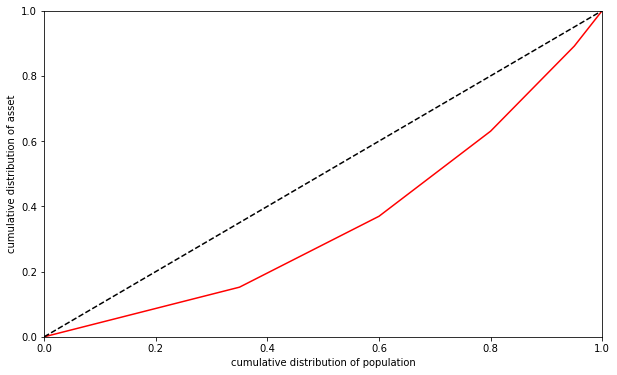

In [48]:
# Lorenz curve
#(0,0) 추가
pop=np.hstack(([0],Λ))
asset=np.hstack(([0],Φ))

plt.plot(pop,asset, c='red')
plt.plot(pop,pop, c='black', ls='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('cumulative distribution of population')
plt.ylabel('cumulative distribution of asset')
plt.show()

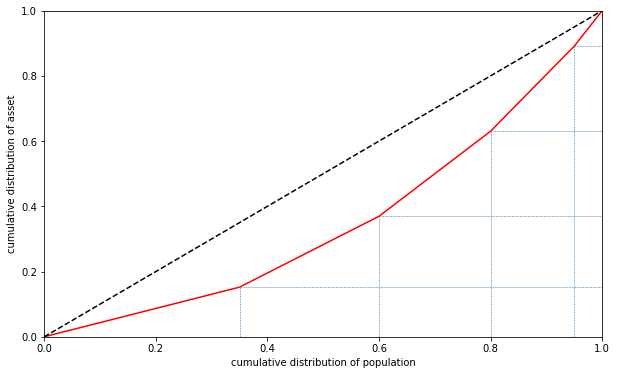

In [59]:
# Lorenz curve 면적구하기

plt.plot(pop,asset, c='red')
plt.plot(pop,pop, c='black', ls='--')
for i in range(len(pop)):
    plt.vlines(pop[i], 0, asset[i], ls='--', lw=0.5)
    plt.hlines(asset[i], pop[i],1, ls='--', lw=0.5)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('cumulative distribution of population')
plt.ylabel('cumulative distribution of asset')
plt.show()

In [60]:
# Gini 계수 구하기: 로렌츠 곡선에서의 면적 구하기
# 위에서 쪼갠대로 빨간선 아래의 범위(Area)에서 사각형과 삼각형의 넓이를 구하여서,
# 지니계수는 1/2에서 빼준다음에 1/2로 나누어준다.

area =0 
for i in range(len(λ)):
    if i==0:
        area += 0.5*(λ[i]*ϕ[i]) # 첫번째는 삼각형 넓이만 포함
    else:
        area += 0.5*(λ[i]*ϕ[i]) + λ[i]*Φ[i-1]  # 삼각형 + 사각형 넓이
print(area)

0.3532608695652173


In [62]:
Gini = (0.5-area)/0.5
print(Gini)

0.2934782608695654


In [66]:
class Lorenz_Gini:
    """
    A : wealth space(Grid)
    λ: 각 grid에서의 분포(density 개념)이고 np.sum(λ)=1 이어야 함.
    """
    
    def __init__(self,
                 A,            # wealth grid (space)
                 λ):          # distribution (density)

        self.A, self.λ = A, λ
    
    def integral(self):
        """
        전체(평균) 자산값을 구하는 함수
        """
        A, λ = self.A, self.λ
        return np.sum(A @ λ)
    
    def x_cdf(self):
        """
        누적 인구밀도 함수
        """
        A, λ = self.A, self.λ
        Λ=np.zeros_like(λ)
        cum=0
        for i in range(len(λ)):
            cum += λ[i]
            Λ[i]= cum
        return Λ
    
    def y_cdf(self):
        """
        누적 자산밀도 함수
        """
        A, λ = self.A, self.λ
        ϕ=(A * λ)/np.sum(A * λ)
        Φ=np.zeros_like(ϕ)
        cum=0
        for i in range(len(ϕ)):
            cum += ϕ[i]
            Φ[i]= cum
        return Φ

    def Lorenz(self, show=True):
        """
        로렌츠 곡선을 그려주는 함수
        """
        A, λ = self.A, self.λ
        Λ, Φ=self.x_cdf(), self.y_cdf()
        pop=np.hstack(([0],Λ))
        asset=np.hstack(([0],Φ))

        plt.plot(pop,asset, c='red')
        plt.plot(pop,pop, c='black', ls='--')
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.title('Lorenz curve')
        plt.xlabel('cumulative distribution of population')
        plt.ylabel('cumulative distribution of asset')
        if show==True:
            plt.show()
        
        return pop, asset
        
    def Gini(self):
        """
        지니계수를 구해주는 함수
        """
        A, λ = self.A, self.λ
        Λ,Φ = self.x_cdf(), self.y_cdf()
        area =0 
        for i in range(len(λ)):
            if i==0:
                area += 0.5*(λ[i]*ϕ[i]) # 첫번째는 삼각형 넓이만 포함
            else:
                area += 0.5*(λ[i]*ϕ[i]) + λ[i]*Φ[i-1]  # 삼각형 + 사각형 넓이
        Gini = (0.5-area)/0.5
        
        return Gini      

In [64]:
test=Lorenz_Gini(A=A, λ=λ)

In [65]:
test.Gini()

0.2934782608695654